# Gradient Descent methods

#### Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Generate initial parameters randomly

In [ ]:
# Fix the seed
np.random.seed(12345)
N = 100
init_list = np.array([6*np.random.random(size=2) - 3 for i in range(0, N)])

#### Useful functions for graphic visualization and calculation of the cost function

In [ ]:
# Plot the surface
def surf_f():
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y, sparse=True)
    z = f((X, Y))
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'},figsize=(8, 6))
    surf = ax.plot_surface(X, Y, z, cmap='coolwarm',
                           linewidth=0, antialiased=False, alpha=0.3)
    fig.colorbar(surf, location='left')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    ax.set_zlim(-5, 50)
    ax.view_init(15,-130)
    return fig, ax

# Plot the projection
def proj_f():
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y, sparse=True)
    z = f((X, Y))
    fig, ax = plt.subplots(figsize=(6, 4))
    proj = ax.contour(x, y, z, levels=20, cmap='coolwarm')
    fig.colorbar(proj, location='right')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return fig, ax

# Plot the trajectory on the surface
def trajectory_surf(ax, theta_list, f):
    ax.plot(theta_list[:,0], theta_list[:,1], f((theta_list[:,0],theta_list[:,1])), '--', c='b')
    ax.plot(theta_list[-1,0], theta_list[-1,1], f((theta_list[-1,0],theta_list[-1,1])), 'o', c='r', ms=6)
    return ax

# Plot the trajectory on the projection
def trajectory_proj(ax, theta_list):
    ax.plot(theta_list[:,0], theta_list[:,1], '--', c='b')
    ax.plot(theta_list[-1,0], theta_list[-1,1], 'o', c='r', ms=6)
    return ax

# Print some info
def info(init, theta_list, f):
    print('theta_init:', init)
    print('theta_best:', theta_list[-1,:])
    print('f(theta_best):', f(theta_list[-1,:]), '\n')
    return None

# Plot the cost function vs epoch
def cost(theta_list, f):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(np.arange(0, theta_list.shape[0]), [f(x) for x in theta_list])
    ax.set_xlabel('epoch')
    ax.set_ylabel('cost function')
    return fig, ax

# Plot the average cost function vs epoch
def cost_avg(f_avg):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(np.arange(0, len(f_avg)), f_avg)
    ax.set_xlabel('epoch')
    ax.set_ylabel('average cost function')
    return fig, ax

## Gradient Descent

$\theta_{t+1}= \theta_t - \eta_t \nabla_\theta E(\theta_t)$

In [ ]:
def GD(grad, init, eta, epochs):
    theta = init
    theta_list = np.zeros([epochs+1,2])
    theta_list[0,:] = theta
    v = 0
    for i in range(0, epochs):
        v = eta*grad(theta)
        theta = theta - v
        theta_list[i+1,:] = theta
    return theta_list

## Gradient Descent with Momentum

$v_{t}=\gamma v_{t-1}+\eta_{t}\nabla_\theta E(\theta_t)$

$\theta_{t+1}= \theta_t -v_{t}$

In [ ]:
def GDM(grad, init, eta, epochs, gamma):
    theta = init
    theta_list = np.zeros([epochs+1,2])
    theta_list[0,:] = theta
    v = 0
    for i in range(0, epochs):
        v = gamma*v + eta*grad(theta)
        theta = theta - v
        theta_list[i+1,:] = theta
    return theta_list

## Nesterov Accelerated Gradient (NAG)

$v_{t}=\gamma v_{t-1}+\eta_{t}\nabla_\theta E(\theta_t+\gamma v_{t-1})$

$\theta_{t+1}= \theta_t -v_{t}$

In [ ]:
def NAG(grad, init, eta, epochs, gamma):
    theta = init
    theta_list = np.zeros([epochs+1,2])
    theta_list[0,:] = theta
    v = 0
    for i in range(0, epochs):
        v = gamma*v + eta*grad(theta - gamma*v)
        theta = theta - v
        theta_list[i+1,:] = theta
    return theta_list

## RMSprop

$\bm{g_{t}}=\nabla_\theta E(\bm{\theta})$

$\bm{s_t}=\beta \bm{s_{t-1}}+(1-\beta)\bm{g^{2}_t}$

$\bm{\theta_{t+1}}= \bm{\theta_t} - \eta\frac{\bm{g_t}}{\sqrt{\bm{s_t}+\epsilon}}$

In [ ]:
def RMS(grad, init, eta, epochs, beta, epsilon):
    theta = init
    theta_list = np.zeros([epochs+1,2])
    theta_list[0,:] = theta
    s = 0
    for i in range(0, epochs):
        g = grad(theta)
        s = beta*s + (1-beta)*g**2
        theta = theta - eta*g/(np.sqrt(s+epsilon))
        theta_list[i+1,:] = theta
    return theta_list

## ADAM

$\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta})$

$\mathbf{m}_t = \beta_1 \mathbf{m}_{t-1} + (1-\beta_1) \mathbf{g}_t$

$\mathbf{s}_t =\beta_2 \mathbf{s}_{t-1} +(1-\beta_2)\mathbf{g}_t^2$

$\hat{\mathbf{m}}_t={\mathbf{m}_t \over 1-(\beta_1)^t}$

$\hat{\mathbf{s}}_t ={\mathbf{s}_t \over1-(\beta_2)^t}$

$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \hat{\mathbf{m}}_t \over \sqrt{\hat{\mathbf{s}}_t +\epsilon}}$

In [ ]:
def ADAM(grad, init, eta, epochs, beta_1, beta_2, epsilon):
    theta = init
    theta_list = np.zeros([epochs+1,2])
    theta_list[0,:] = theta
    m, m_hat = 0, 0
    s, s_hat = 0, 0
    for i in range(0, epochs):
        g = grad(theta)
        m = beta_1*m + (1-beta_1)*g
        s = beta_2*s + (1-beta_2)*g**2
        m_hat = m/(1-(beta_1)**(i+1))
        s_hat = s/(1-(beta_2)**(i+1))
        theta = theta - eta*m_hat/(np.sqrt(s_hat+epsilon))
        theta_list[i+1,:] = theta
    return theta_list

# Functions

In [ ]:
# Function 1
def f(x, b=20, w=10, q=0.1):
    return b*(1 - np.exp((-0.5*w*(x[0]**2 + x[1]**2)))) + 0.5*q*(-x[0]**3 + x[1])**2

def grad_f(x, b=20, w=10, q=0.1):
    grad_x = b*np.exp(-0.5*w*(x[0]**2 + x[1]**2))*w*x[0] - 3*q*(x[0]**2)*(-x[0]**3 + x[1])
    grad_y = b*np.exp(-0.5*w*(x[0]**2 + x[1]**2))*w*x[1] + q*(-x[0]**3 + x[1])
    return np.array([grad_x, grad_y])

'''# Function 2
def f(x, q=6):
    return 1 + 0.5*q*(x[0]**2 + x[1]**2) - np.cos(2*np.pi*(x[0]*x[1] - x[1]**2))

def grad_f(x, q=6): 
    grad_x = q*x[0] + 2*np.pi*x[1]*np.sin(2*np.pi*(x[0]*x[1] - x[1]**2))
    grad_y = q*x[1] + 2*np.pi*(x[0]-2*x[1])*np.sin(2*np.pi*(x[0]*x[1] - x[1]**2))
    return np.array([grad_x, grad_y])'''

'# Function 2\ndef f(x, q=6):\n    return 1 + 0.5*q*(x[0]**2 + x[1]**2) - np.cos(2*np.pi*(x[0]*x[1] - x[1]**2))\n\ndef grad_f(x, q=6): \n    grad_x = q*x[0] + 2*np.pi*x[1]*np.sin(2*np.pi*(x[0]*x[1] - x[1]**2))\n    grad_y = q*x[1] + 2*np.pi*(x[0]-2*x[1])*np.sin(2*np.pi*(x[0]*x[1] - x[1]**2))\n    return np.array([grad_x, grad_y])'

## Gradient Descent

eta: 0.01
epochs: 1000
best score: 6.41


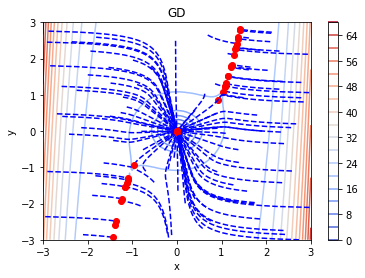

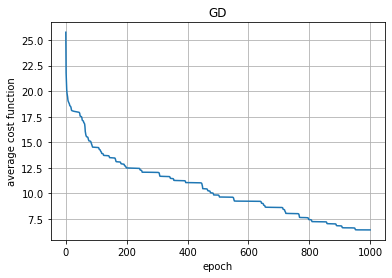

In [ ]:
# Plot the projection
fig, ax = proj_f()

# Set the hyper-parameters
eta = 0.01
epochs = 1000

# Average cost function
f_avg = np.zeros(epochs+1)

for i in range(0, len(init_list)):
    init = init_list[i]
    # Minimize
    theta_list = GD(grad_f, init, eta, epochs)
    # Plot the trajectory
    trajectory_proj(ax, theta_list)
    # Update the average cost function
    f_avg += np.array([f(x) for x in theta_list])/len(init_list)

print('eta:', eta)
print('epochs:', epochs)
print('best score:', '{:.2f}'.format(f_avg[-1]))

ax.set_title('GD')
plt.show()

# Plot the average cost function vs epoch
fig, ax = cost_avg(f_avg)
ax.set_title('GD')
plt.grid()
plt.show()

theta_init: [-1.50043849  0.40970137]
theta_best: [ 0.00383046 -0.00941993]
f(theta_best): 0.01034251101440972 



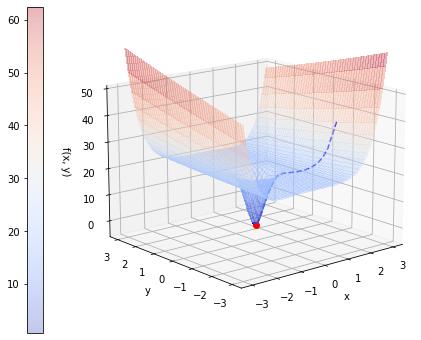

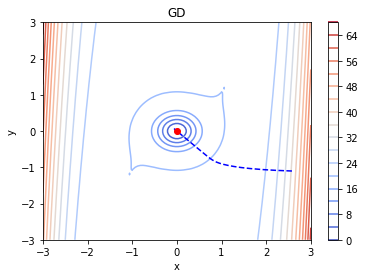

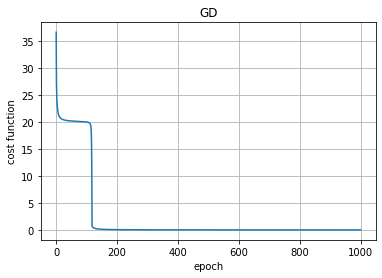

In [ ]:
theta_list = GD(grad_f, init_list[0], eta, epochs)

# Print some info
info(init, theta_list, f)

# Plot the surface
fig, ax = surf_f()
# Plot the trajectory
trajectory_surf(ax, theta_list, f)
plt.show()

# Plot the projection
fig, ax = proj_f()
# Plot the trajectory
trajectory_proj(ax, theta_list)
ax.set_title('GD')
plt.show()

# Plot the cost function vs epoch
fig, ax = cost(theta_list, f)
ax.set_title('GD')
plt.grid()
plt.show()

## Gradient Descent with Momentum

eta: 0.01
epochs: 1000
gamma: 0.8
best score: 6.00


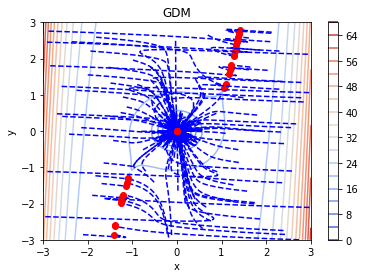

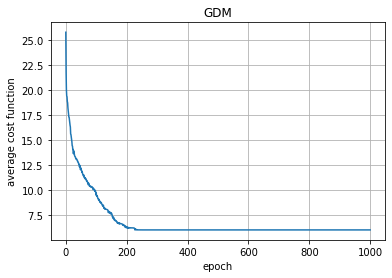

In [ ]:
# Plot the projection
fig, ax = proj_f()

# Set the hyper-parameters
eta = 0.01
epochs = 1000
gamma = 0.8

# Average cost function
f_avg = np.zeros(epochs+1)

for i in range(0, len(init_list)):
    init = init_list[i]
    # Minimize
    theta_list = GDM(grad_f, init, eta, epochs, gamma)
    # Plot the trajectory
    trajectory_proj(ax, theta_list)
    # Update the average cost function
    f_avg += np.array([f(x) for x in theta_list])/len(init_list)

print('eta:', eta)
print('epochs:', epochs)
print('gamma:', gamma)
print('best score:', '{:.2f}'.format(f_avg[-1]))

ax.set_title('GDM')
plt.show()

# Plot the average cost function vs epoch
fig, ax = cost_avg(f_avg)
ax.set_title('GDM')
plt.grid()
plt.show()

theta_init: [-1.50043849  0.40970137]
theta_best: [-7.41796047e-49 -9.12871357e-49]
f(theta_best): 4.166670567703385e-98 



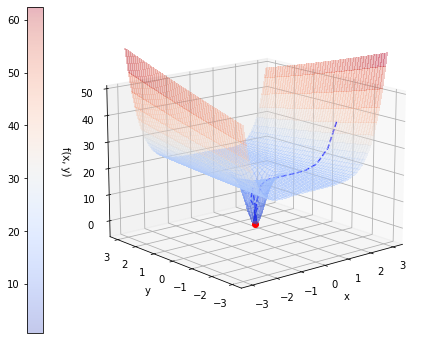

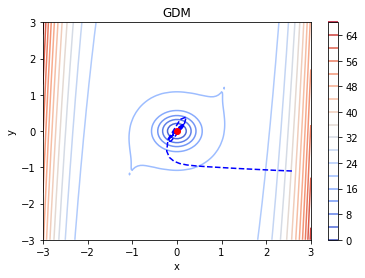

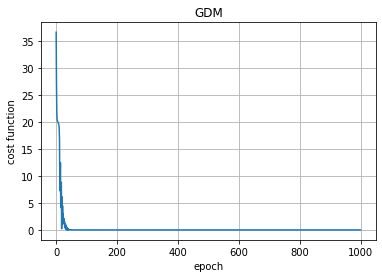

In [ ]:
theta_list = GDM(grad_f, init_list[0], eta, epochs, gamma)

# Print some info
info(init, theta_list, f)

# Plot the surface
fig, ax = surf_f()
# Plot the trajectory
trajectory_surf(ax, theta_list, f)
plt.show()

# Plot the projection
fig, ax = proj_f()
# Plot the trajectory
trajectory_proj(ax, theta_list)
ax.set_title('GDM')
plt.show()

# Plot the cost function vs epoch
fig, ax = cost(theta_list, f)
ax.set_title('GDM')
plt.grid()
plt.show()

## Nesterov Accelerated Gradient (NAG)

eta: 0.01
epochs: 1000
gamma: 0.8
best score: 6.36


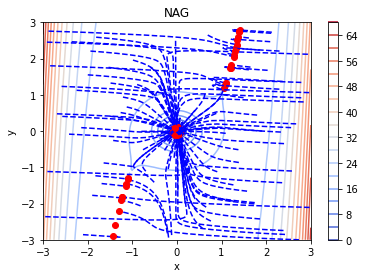

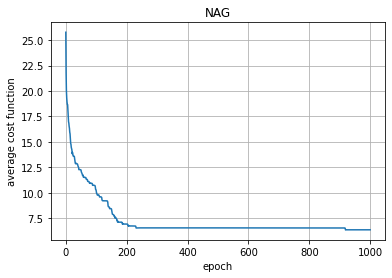

In [ ]:
# Plot the projection
fig, ax = proj_f()

# Set the hyper-parameters
eta = 0.01
epochs = 1000
gamma = 0.8

# Average cost function
f_avg = np.zeros(epochs+1)

for i in range(0, len(init_list)):
    init = init_list[i]
    # Minimize
    theta_list = NAG(grad_f, init, eta, epochs, gamma)
    # Plot the trajectory
    trajectory_proj(ax, theta_list)
    # Update the average cost function
    f_avg += np.array([f(x) for x in theta_list])/len(init_list)

print('eta:', eta)
print('epochs:', epochs)
print('gamma:', gamma)
print('best score:', '{:.2f}'.format(f_avg[-1]))

ax.set_title('NAG')
plt.show()

# Plot the average cost function vs epoch
fig, ax = cost_avg(f_avg)
ax.set_title('NAG')
plt.grid()
plt.show()

theta_init: [-1.50043849  0.40970137]
theta_best: [0.00763943 0.1041265 ]
f(theta_best): 1.0614372379635972 



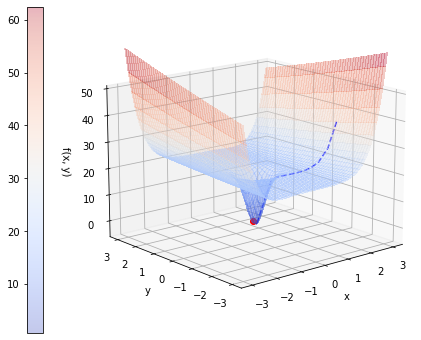

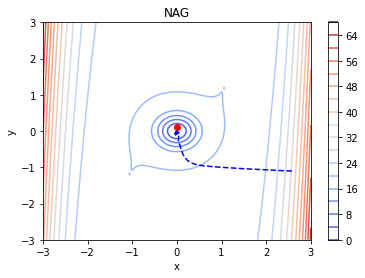

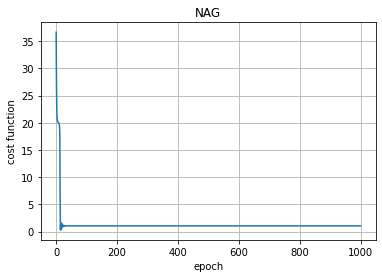

In [ ]:
theta_list = NAG(grad_f, init_list[0], eta, epochs, gamma)

# Print some info
info(init, theta_list, f)

# Plot the surface
fig, ax = surf_f()
# Plot the trajectory
trajectory_surf(ax, theta_list, f)
plt.show()

# Plot the projection
fig, ax = proj_f()
# Plot the trajectory
trajectory_proj(ax, theta_list)
ax.set_title('NAG')
plt.show()

# Plot the cost function vs epoch
fig, ax = cost(theta_list, f)
ax.set_title('NAG')
plt.grid()
plt.show()

## RMSprop

eta: 0.1
epochs: 1000
beta: 0.9
epsilon: 1e-08
best score: 1.47


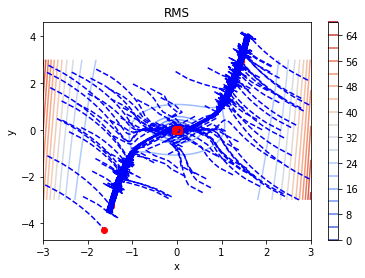

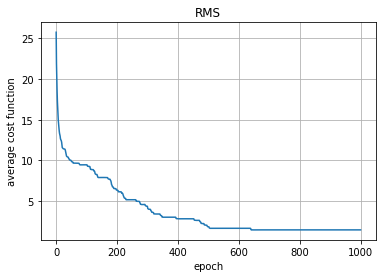

In [ ]:
# Plot the projection
fig, ax = proj_f()

# Set the hyper-parameters
eta = 0.1
epochs = 1000
beta = 0.9
epsilon = 1e-8

# Average cost function
f_avg = np.zeros(epochs+1)

for i in range(0, len(init_list)):
    init = init_list[i]
    # Minimize
    theta_list = RMS(grad_f, init, eta, epochs, beta, epsilon)
    # Plot the trajectory
    trajectory_proj(ax, theta_list)
    # Update the average cost function
    f_avg += np.array([f(x) for x in theta_list])/len(init_list)

print('eta:', eta)
print('epochs:', epochs)
print('beta:', beta)
print('epsilon:', epsilon)
print('best score:', '{:.2f}'.format(f_avg[-1]))
    
ax.set_title('RMS')
plt.show()

# Plot the average cost function vs epoch
fig, ax = cost_avg(f_avg)
ax.set_title('RMS')
plt.grid()
plt.show()

theta_init: [-1.50043849  0.40970137]
theta_best: [-0.05  0.05]
f(theta_best): 0.49392738516334544 



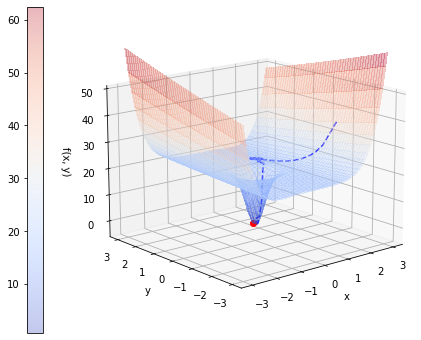

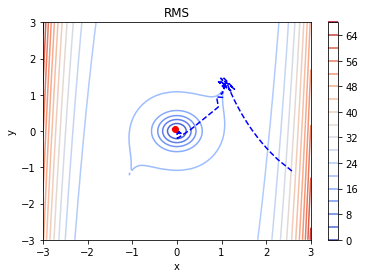

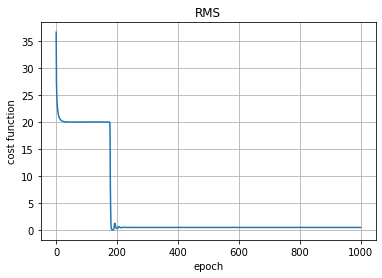

In [ ]:
theta_list = RMS(grad_f, init_list[0], eta, epochs, beta, epsilon)

# Print some info
info(init, theta_list, f)

# Plot the surface
fig, ax = surf_f()
# Plot the trajectory
trajectory_surf(ax, theta_list, f)
plt.show()

# Plot the projection
fig, ax = proj_f()
# Plot the trajectory
trajectory_proj(ax, theta_list)
ax.set_title('RMS')
plt.show()

# Plot the cost function vs epoch
fig, ax = cost(theta_list, f)
ax.set_title('RMS')
plt.grid()
plt.show()

## ADAM

eta: 0.1
epochs: 1000
beta_1: 0.9
beta_2 0.99
epsilon: 1e-08
best score: 4.20


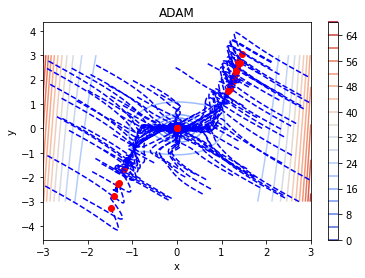

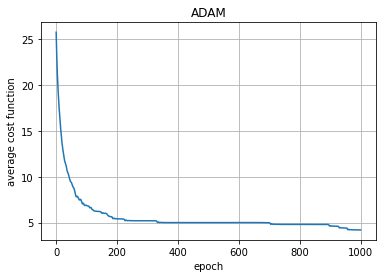

In [ ]:
# Plot the projection
fig, ax = proj_f()

# Set the hyper-parameters
eta = 0.1
epochs = 1000
beta_1 = 0.9
beta_2 = 0.99
epsilon = 1e-8

# Average cost function
f_avg = np.zeros(epochs+1)

for i in range(0, len(init_list)):
    init = init_list[i]
    # Minimize
    theta_list = ADAM(grad_f, init, eta, epochs, beta_1, beta_2, epsilon)
    # Plot the trajectory
    trajectory_proj(ax, theta_list)
    # Update the average cost function
    f_avg += np.array([f(x) for x in theta_list])/len(init_list)

print('eta:', eta)
print('epochs:', epochs)
print('beta_1:', beta_1)
print('beta_2', beta_2)
print('epsilon:', epsilon)
print('best score:', '{:.2f}'.format(f_avg[-1]))
    
ax.set_title('ADAM')
plt.show()

# Plot the average cost function vs epoch
fig, ax = cost_avg(f_avg)
ax.set_title('ADAM')
plt.grid()
plt.show()

theta_init: [-1.50043849  0.40970137]
theta_best: [-0.0076128   0.00327021]
f(theta_best): 0.006864254973878668 



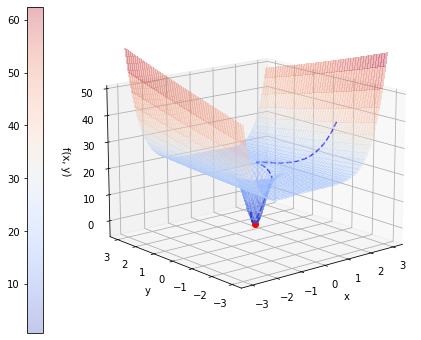

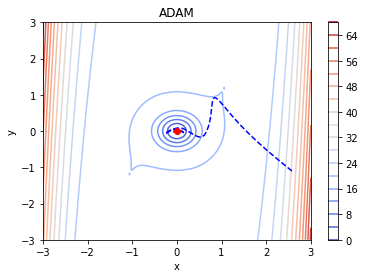

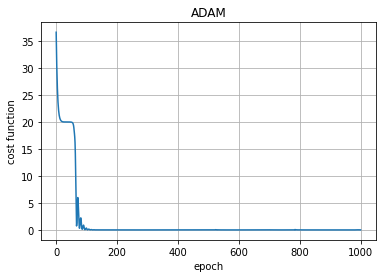

In [ ]:
theta_list = ADAM(grad_f, init_list[0], eta, epochs, beta_1, beta_2, epsilon)

# Print some info
info(init, theta_list, f)

# Plot the surface
fig, ax = surf_f()
# Plot the trajectory
trajectory_surf(ax, theta_list, f)
plt.show()

# Plot the projection
fig, ax = proj_f()
# Plot the trajectory
trajectory_proj(ax, theta_list)
ax.set_title('ADAM')
plt.show()

# Plot the cost function vs epoch
fig, ax = cost(theta_list, f)
ax.set_title('ADAM')
plt.grid()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=275fcae3-789f-4d9e-8065-34754b83daa0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>